# <span style='color:dodgerblue; font-weight:bold;'> Red Wine Quality </span>

### <span style='color:aqua; font-weight:bold;'> About Dataset </span>

<b>Context<b>

    The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

    These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).

<b>Contents<b>

    For more information, read [Cortez et al., 2009].
    Input variables (based on physicochemical tests):
    1 - fixed acidity
    2 - volatile acidity
    3 - citric acid
    4 - residual sugar
    5 - chlorides
    6 - free sulfur dioxide
    7 - total sulfur dioxide
    8 - density
    9 - pH
    10 - sulphates
    11 - alcohol
    Output variable (based on sensory data):
    12 - quality (score between 0 and 10)


<b>Inspiration<b>

    Use machine learning to determine which physiochemical properties make a wine 'good'!


### <span style='color:aqua; font-weight:bold;'> Import Packages and Load the data </span>

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as ex
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc

In [36]:
wine_df = pd.read_csv("winequality-red.csv")

# <span style='color:dodgerblue; font-weight:bold;'>Exploratory Data Analysis </span>

In [37]:
wine_df.shape

(1599, 12)

In [38]:
wine_df.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

In [39]:
wine_df['pH'].values

array([3.51, 3.2 , 3.26, ..., 3.42, 3.57, 3.39])

In [40]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [41]:
wine_df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [42]:
wine_df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

# <span style='color:dodgerblue; font-weight:bold;'>Plot relationship between variables</span> 

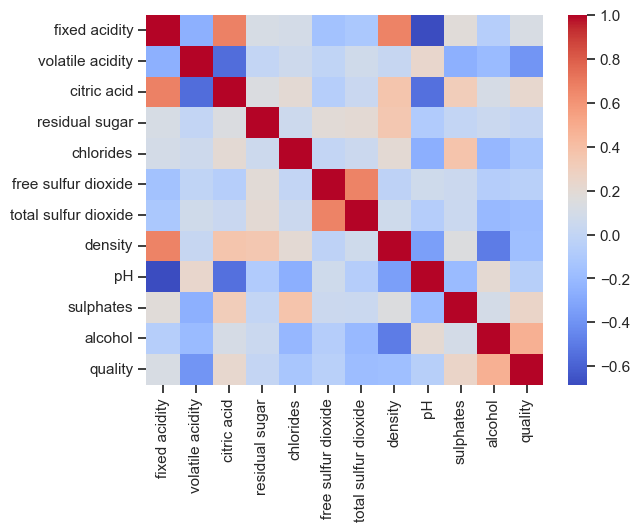

In [43]:
corr = wine_df.corr()
sns.heatmap(corr, cmap="coolwarm");

Alcohol Vs Quality

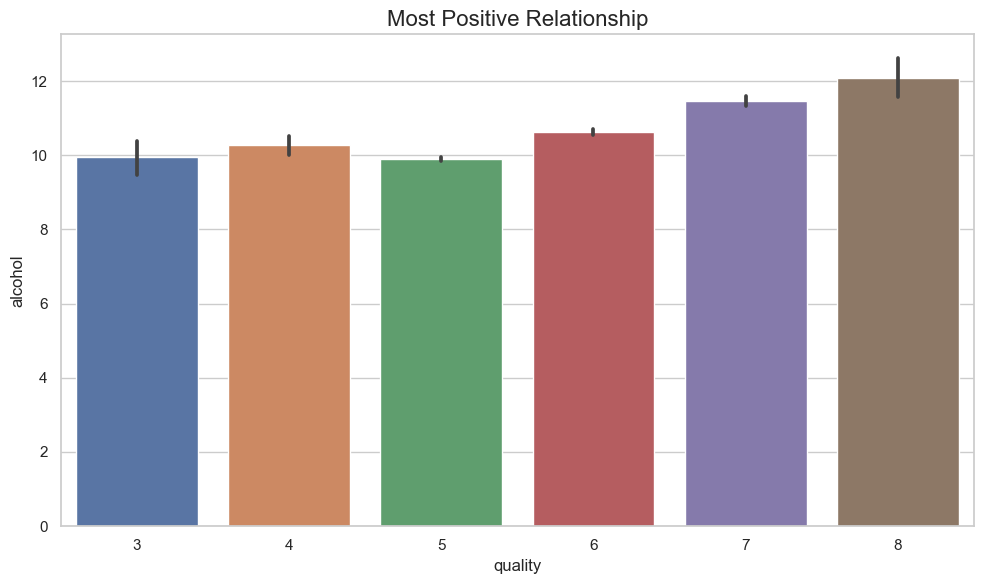

In [44]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x="quality", y="alcohol", data=wine_df)
plt.title("Most Positive Relationship", fontsize=16)
ax.set_xlabel("quality", fontsize=12)
ax.set_ylabel("alcohol", fontsize=12)
plt.tight_layout()
plt.show()

Volatile Acidity Vs Quality

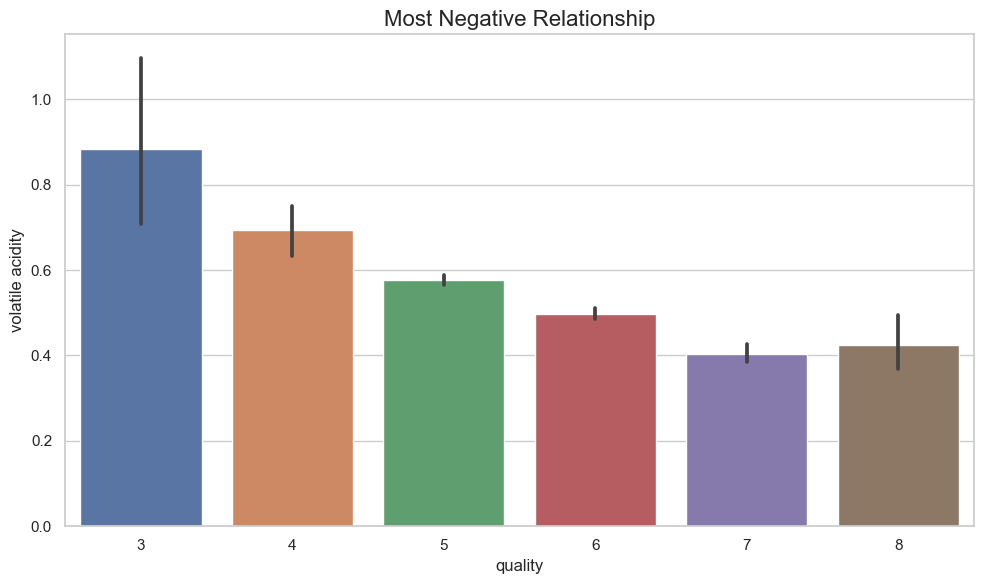

In [45]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x="quality", y="volatile acidity", data=wine_df)
plt.title("Most Negative Relationship", fontsize=16)
ax.set_xlabel("quality", fontsize=12)
ax.set_ylabel("volatile acidity", fontsize=12)
plt.tight_layout()
plt.show()

Density Vs. Alcohol and Residual Sugar

c:\Users\dahab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\dahab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\dahab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\dahab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



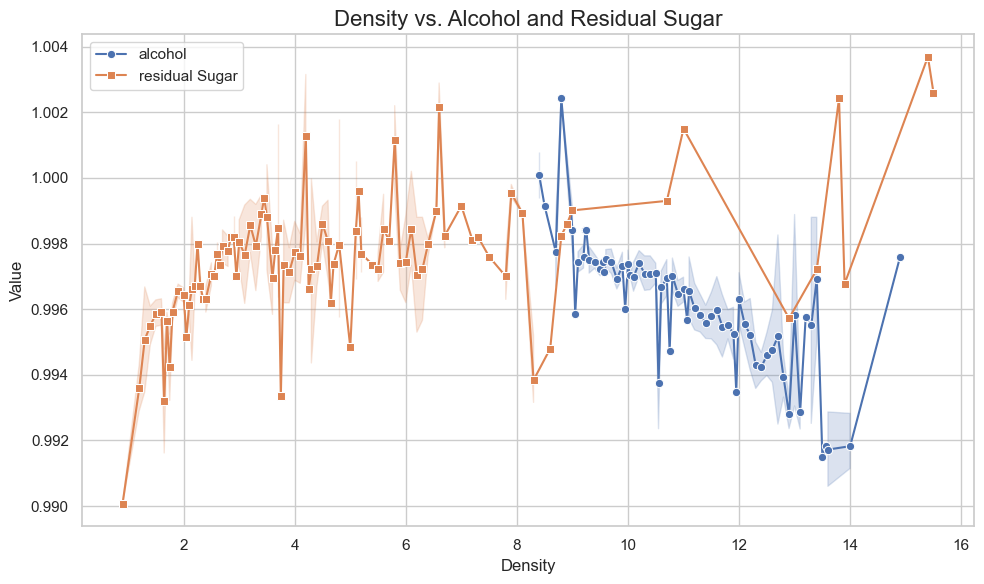

In [46]:
plt.figure(figsize=(10, 6))

# Create line plots for 'alcohol' and 'residual sugar' against 'density'
sns.lineplot(x="alcohol", y="density", data=wine_df, label='alcohol', marker='o')
sns.lineplot(x="residual sugar", y="density", data=wine_df, label='residual Sugar', marker='s')

plt.title("Density vs. Alcohol and Residual Sugar", fontsize=16)
plt.xlabel("Density", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

Pairplot

c:\Users\dahab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\dahab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\dahab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\dahab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\dahab\anaconda3\Lib\site-pa

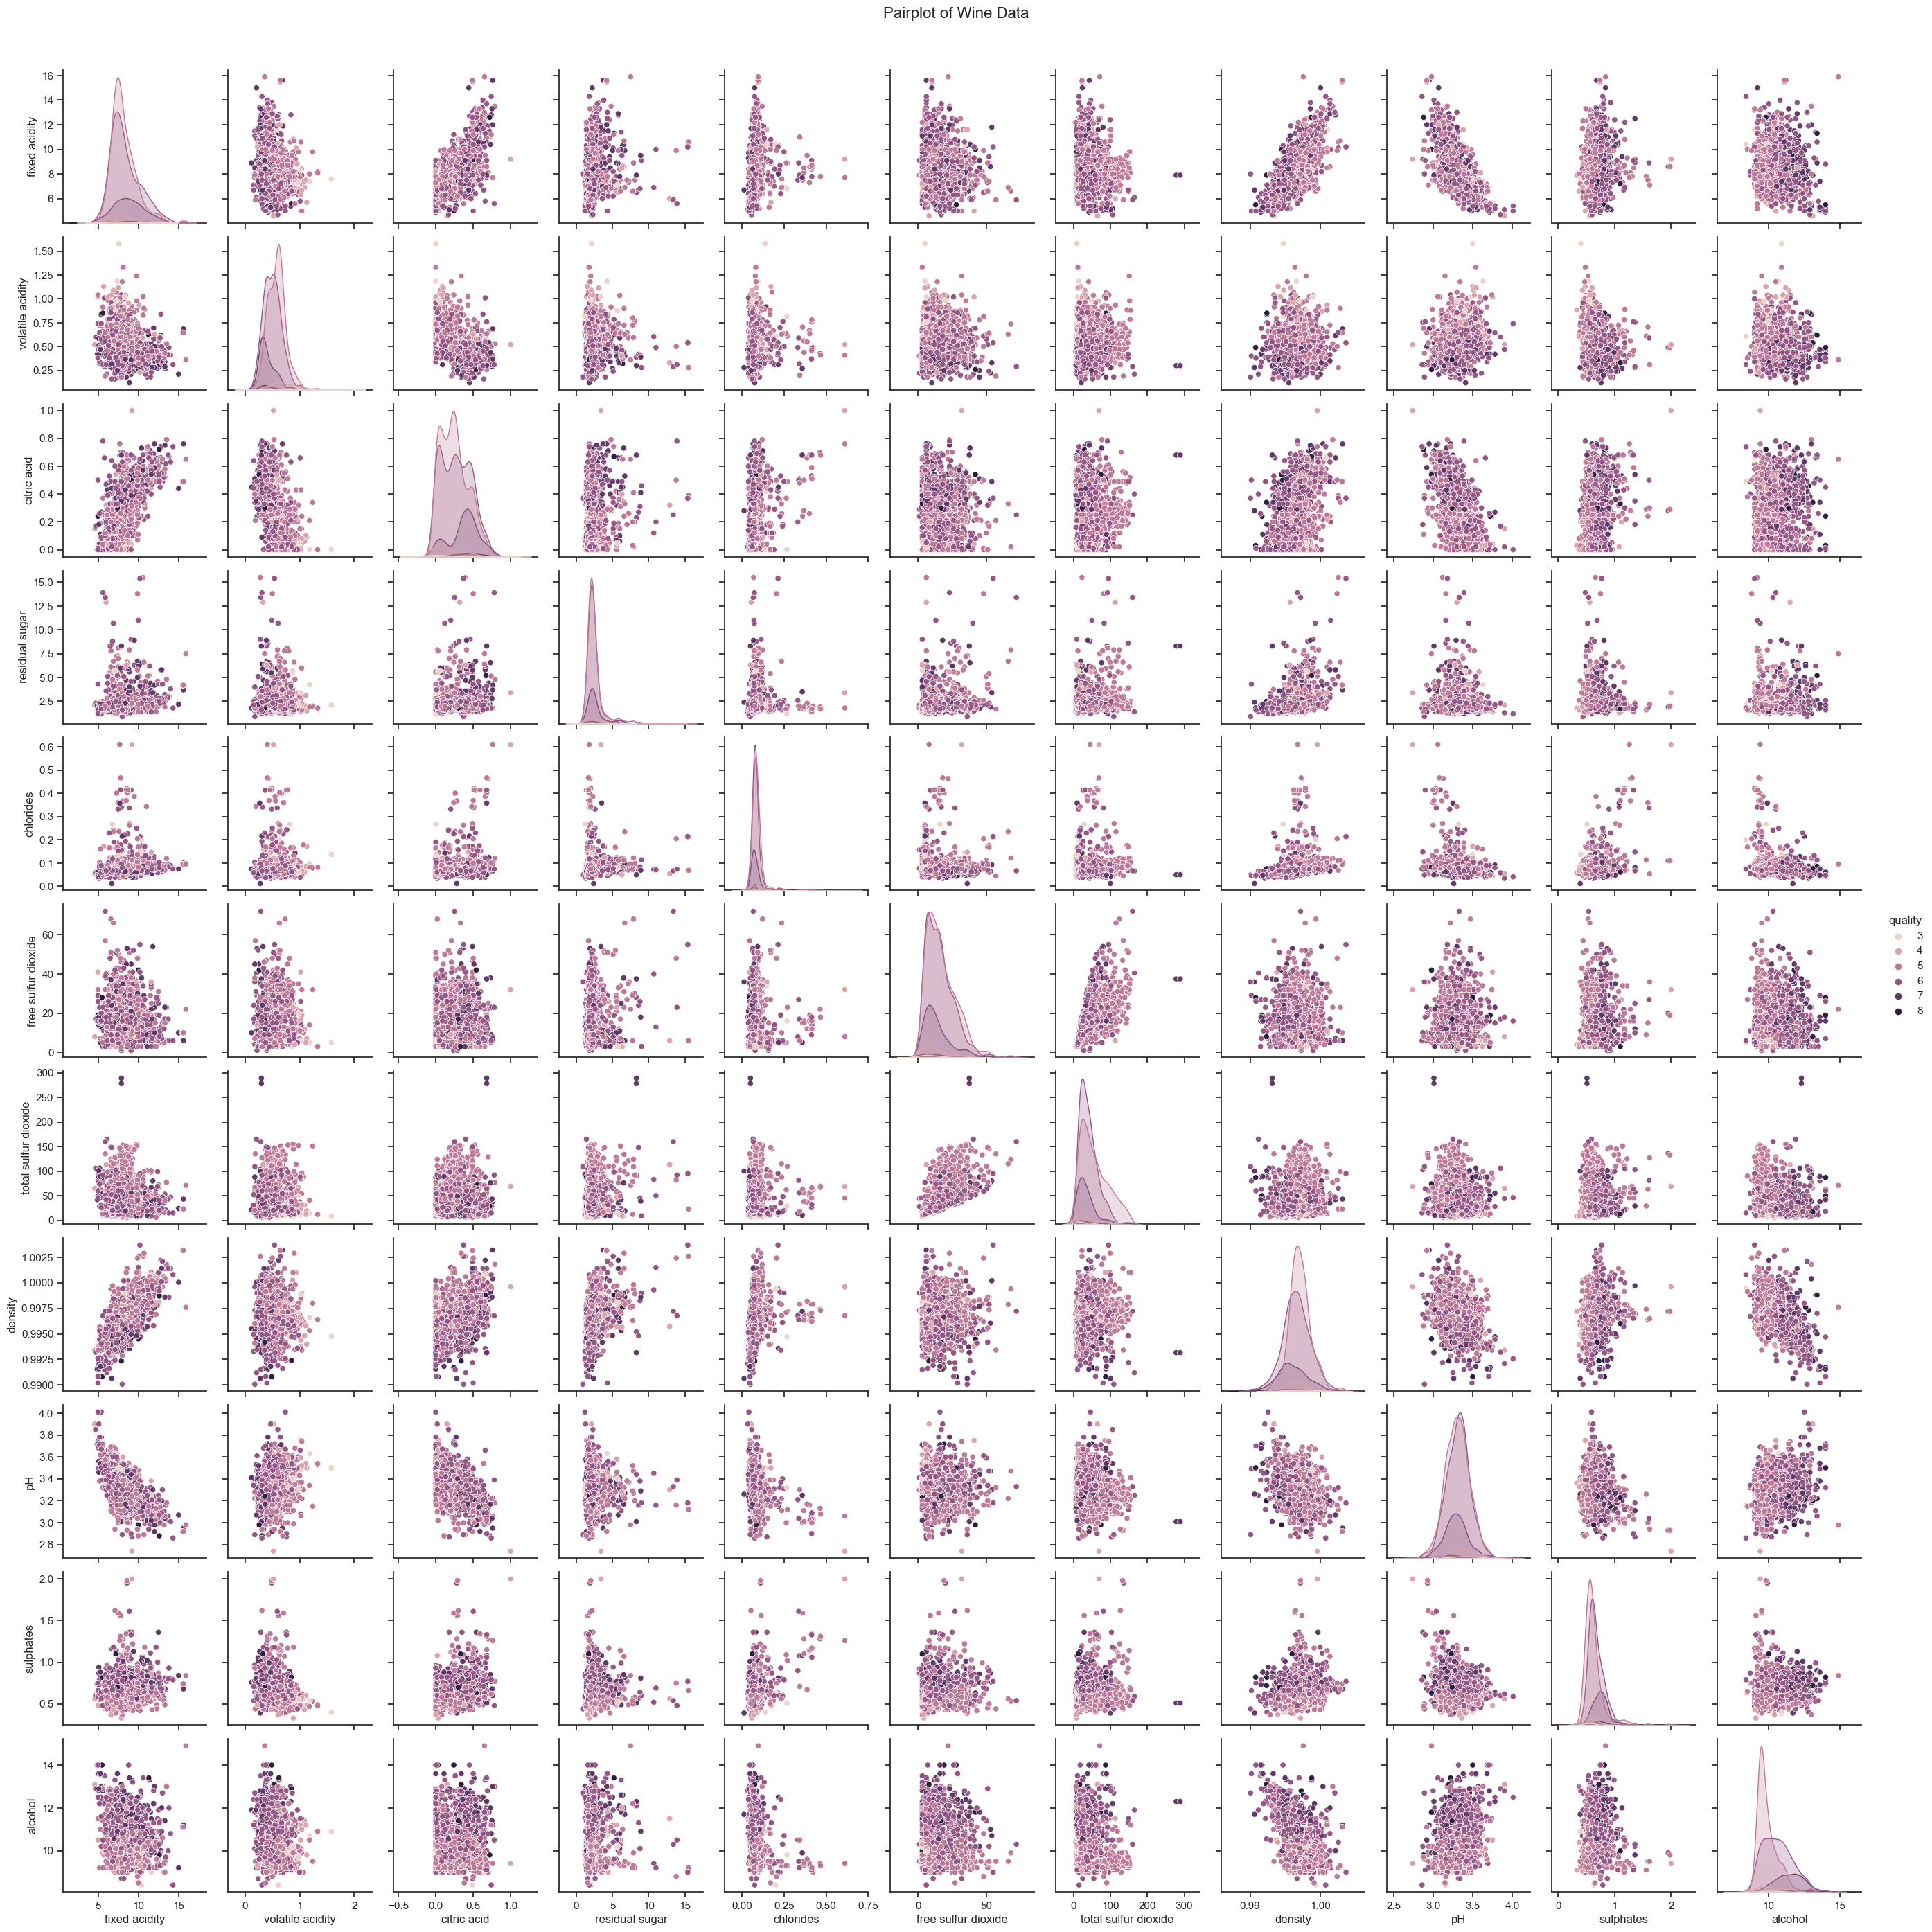

In [47]:
# Set the style and create a pairplot
sns.set(style="ticks")
sns.pairplot(wine_df, diag_kind="kde", markers="o", hue="quality")

plt.suptitle("Pairplot of Wine Data", y=1.02, fontsize=16)
plt.show()

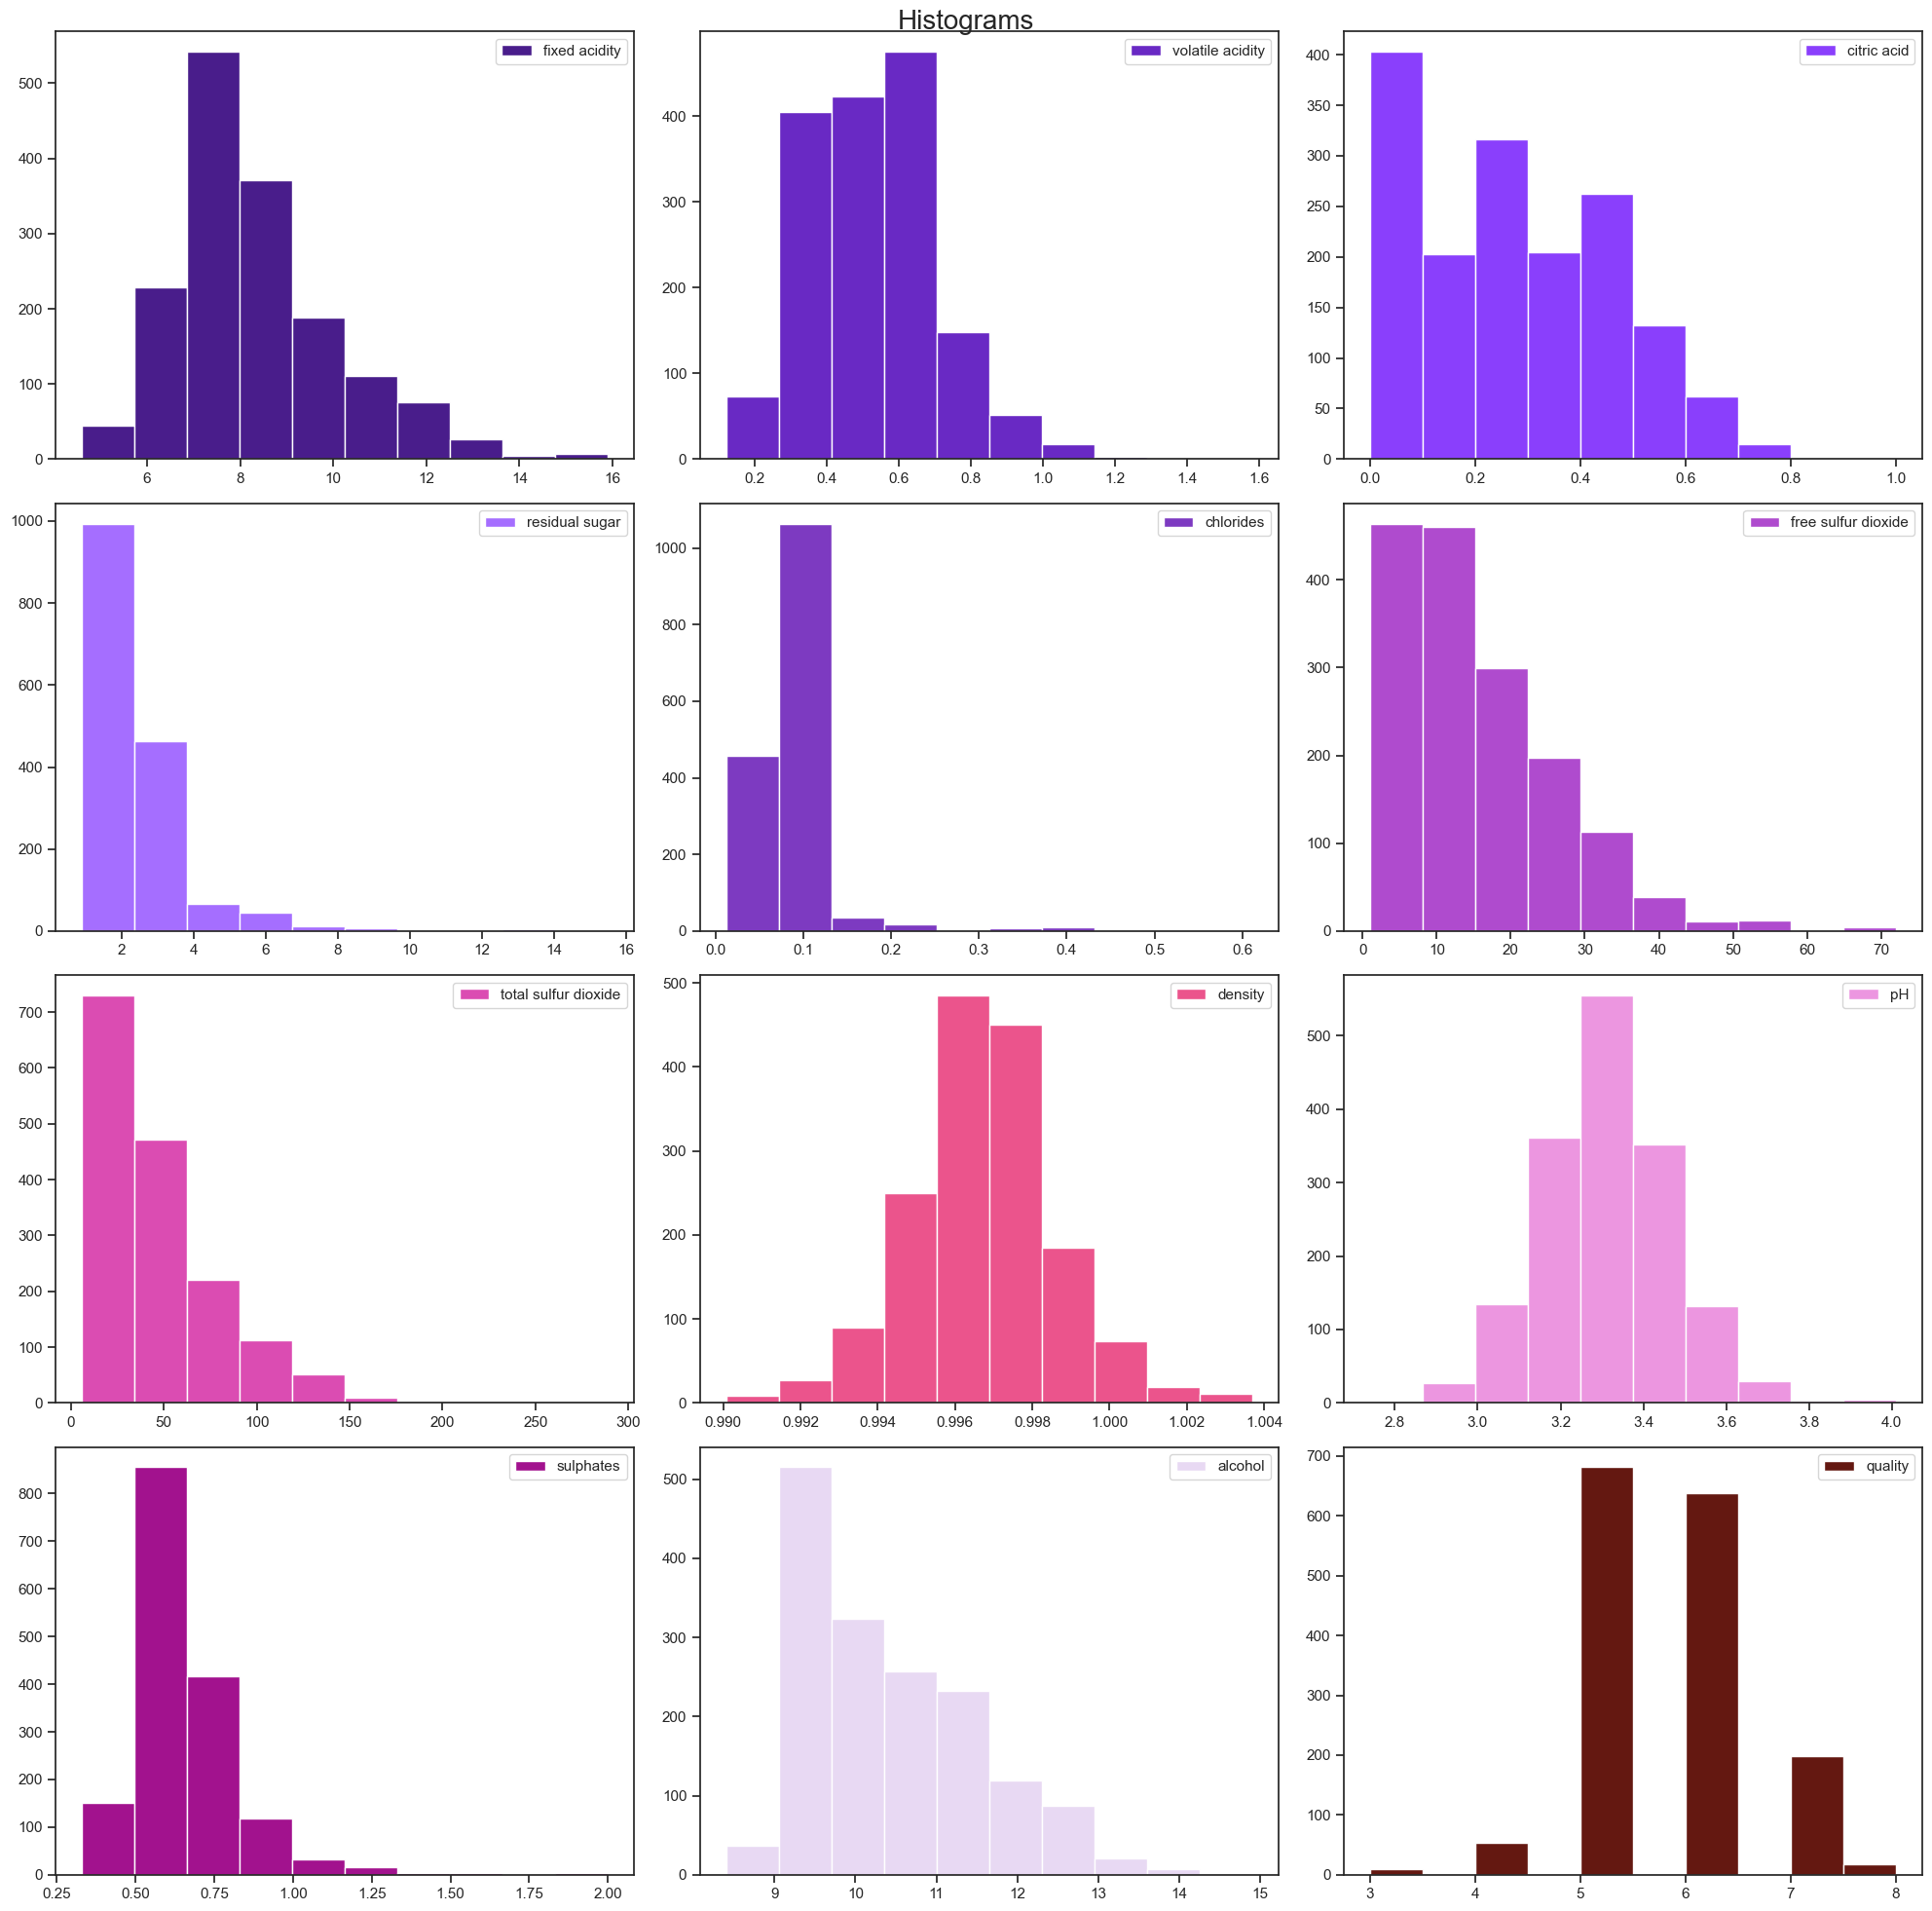

In [48]:
# Create a 4x3 grid of subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))

# Modify the color list to match the number of columns in your dataset
colors = ['#491D8B', '#6929C4', '#8A3FFC', '#A56EFF',
          '#7D3AC1', '#AF4BCE', '#DB4CB2', '#EB548C',
          '#EC96E0', '#A2128E', '#E8D9F3', '#641811']

# Loop through each column in your wine_df dataset
for index, column in enumerate(wine_df.columns):
    if index < 12:  # Limit the iteration to the number of subplots
        ax = axes.flatten()[index]
        ax.hist(wine_df[column], color=colors[index], label=column)
        ax.legend(loc="best")

plt.suptitle("Histograms", size=20)
plt.tight_layout()
plt.show()

# <span style='color:dodgerblue; font-weight:bold;'>Data Cleaning</span> 

### <span style='color:aqua; font-weight:bold;'> Missing Values </span>

In [49]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### <span style='color:aqua; font-weight:bold;'> Data Redundancy </span>

In [50]:
# Check for duplicates across all columns
duplicated = wine_df.duplicated()

# Print the number of duplicated instances
print("Number of duplicated instances:", duplicated.sum())

# Print the duplicated instances
wine_df[duplicated]

Number of duplicated instances: 240


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.4             0.700         0.00            1.90      0.076   
11              7.5             0.500         0.36            6.10      0.071   
27              7.9             0.430         0.21            1.60      0.106   
40              7.3             0.450         0.36            5.90      0.074   
65              7.2             0.725         0.05            4.65      0.086   
...             ...               ...          ...             ...        ...   
1563            7.2             0.695         0.13            2.00      0.076   
1564            7.2             0.695         0.13            2.00      0.076   
1567            7.2             0.695         0.13            2.00      0.076   
1581            6.2             0.560         0.09            1.70      0.053   
1596            6.3             0.510         0.13            2.30      0.076   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4                    11.0                  34.0  0.99780  3.51       0.56   
11                   17.0                 102.0  0.99780  3.35       0.80   
27                   10.0                  37.0  0.99660  3.17       0.91   
40                   12.0                  87.0  0.99780  3.33       0.83   
65                    4.0                  11.0  0.99620  3.41       0.39   
...                   ...                   ...      ...   ...        ...   
1563                 12.0                  20.0  0.99546  3.29       0.54   
1564                 12.0                  20.0  0.99546  3.29       0.54   
1567                 12.0                  20.0  0.99546  3.29       0.54   
1581                 24.0                  32.0  0.99402  3.54       0.60   
1596                 29.0                  40.0  0.99574  3.42       0.75   

      alcohol  quality  
4         9.4        5  
11       10.5        5  
27        9.5        5  
40       10.5        5  
65       10.9        5  
...       ...      ...  
1563     10.1        5  
1564     10.1        5  
1567     10.1        5  
1581     11.3        5  
1596     11.0        6  

[240 rows x 12 columns]

In [51]:
wine_df = wine_df.drop_duplicates()

In [52]:
# Make sure there is no more duplicates.
duplicated = wine_df.duplicated()

print("Number of duplicated instances:", duplicated.sum())
wine_df[duplicated]

Number of duplicated instances: 0


Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality]
Index: []

### <span style='color:aqua; font-weight:bold;'> (wine quality) 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'. </span>

In [53]:
wine_df["quality"] = np.where(wine_df["quality"] >= 7, 1, 0)

In [54]:
wine_df['quality'].value_counts()

quality
0    1175
1     184
Name: count, dtype: int64

# <span style='color:dodgerblue; font-weight:bold;'>Machine Learning</span> 

### <span style='color:aqua; font-weight:bold;'>Pre-processing Steps for Machine Learning</span> 

In [55]:
X = wine_df.drop('quality', axis=1)
y = wine_df['quality']

### <span style='color:aqua; font-weight:bold;'>Splitting the data</span> 

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

### <span style='color:aqua; font-weight:bold;'>Feature Scaling</span> 

In [57]:
# Standardize the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### <span style='color:aqua; font-weight:bold;'> Handling Imbalanced </span>

In [58]:
fig = ex.pie(y_train, names='quality')
fig.update_layout(title='<b>Qualtiy Proportion before SMOTE Upsampling<b>')
fig.show()

In [59]:
# transform the dataset
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
print(pd.Series(y_train).value_counts())

quality
1    874
0    874
Name: count, dtype: int64


In [60]:
fig = ex.pie(y_train, names='quality')
fig.update_layout(title='<b>Qualtiy Proportion after SMOTE Upsampling<b>')
fig.show()

# <span style='color:dodgerblue; font-weight:bold;'>Decision Tree</span> 

In [61]:
# Create a Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display a classification report for more detailed metrics
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       301
           1       0.31      0.49      0.38        39

    accuracy                           0.82       340
   macro avg       0.62      0.67      0.64       340
weighted avg       0.86      0.82      0.83       340



### <span style='color:aqua; font-weight:bold;'> Cross Validation </span> 

In [62]:
# Specify the cross-validation strategy
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(dt, X, y, cv=cv, scoring='accuracy')  # You can choose a different scoring metric
print("Cross-validation scores:", scores)

# Calculate and print the mean and standard deviation of the scores
mean_score = scores.mean()
std_score = scores.std()
print(f"Mean accuracy: {mean_score:.2f}")
print(f"Standard deviation: {std_score:.2f}")

Cross-validation scores: [0.81617647 0.84558824 0.83823529 0.88235294 0.83088235 0.84558824
 0.88235294 0.80882353 0.84558824 0.86666667]
Mean accuracy: 0.85
Standard deviation: 0.02


### <span style='color:aqua; font-weight:bold;'> ROC Curve </span> 

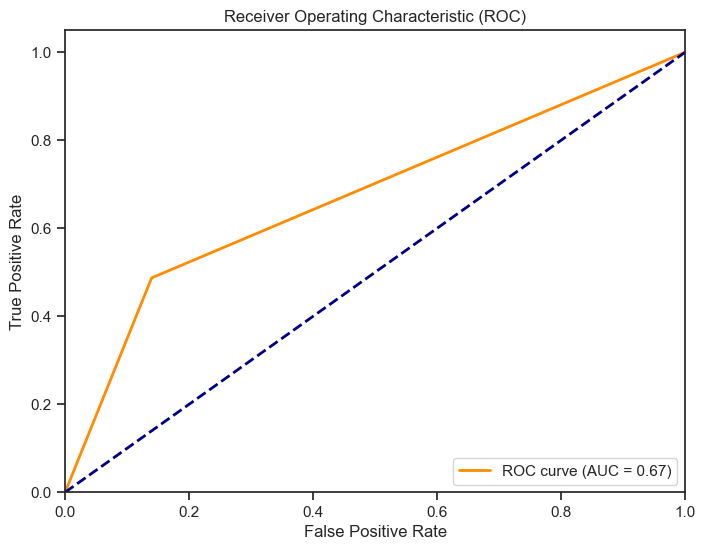

In [63]:
# Calculate ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, dt.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# <span style='color:dodgerblue; font-weight:bold;'>Random Forest</span> 

In [64]:
# Create a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display a classification report for more detailed metrics
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       301
           1       0.38      0.56      0.45        39

    accuracy                           0.84       340
   macro avg       0.66      0.72      0.68       340
weighted avg       0.88      0.84      0.86       340



### <span style='color:aqua; font-weight:bold;'> Cross Validation </span> 

In [65]:
# Specify the cross-validation strategy
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(rf, X, y, cv=cv, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Calculate and print the mean and standard deviation of the scores
mean_score = scores.mean()
std_score = scores.std()
print(f"Mean accuracy: {mean_score:.2f}")
print(f"Standard deviation: {std_score:.2f}")

Cross-validation scores: [0.88235294 0.89705882 0.91911765 0.89705882 0.90441176 0.88235294
 0.86764706 0.86029412 0.86029412 0.8962963 ]
Mean accuracy: 0.89
Standard deviation: 0.02


### <span style='color:aqua; font-weight:bold;'> ROC Curve</span> 

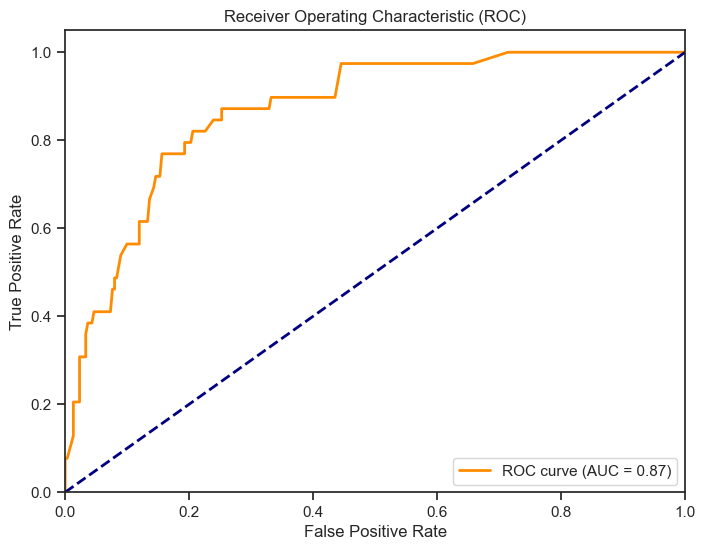

In [66]:
# Calculate ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### <span style='color:aqua; font-weight:bold;'> Feature Importance </span> 

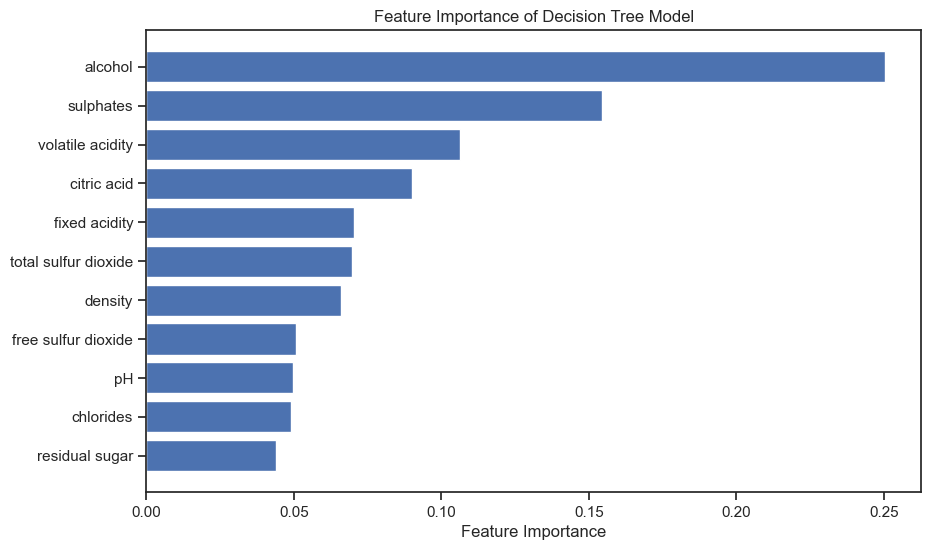

In [67]:
# Get feature importances
feature_importance = rf.feature_importances_
feature_names = X.columns

# Sort features by importance
sorted_idx = feature_importance.argsort()

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance of Decision Tree Model')
plt.show()

### <span style='color:aqua; font-weight:bold;'> Grid Search </span> 

In [68]:
from sklearn.model_selection import GridSearchCV
# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': 20, 'n_estimators': 150}
Best Accuracy: 0.9261972984036021
